In [106]:
import pandas as pd
import seaborn as sns

### **Reading Files!-**
- Boston Dataset

In [107]:
df_boston_csv = pd.read_csv('https://github.com/pri-cd/Internship-Python-Analytics/raw/main/Datasets/Boston.csv')
df_boston_csv.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [108]:
print(f"The Shape of dataset is: {df_boston_csv.shape}")
print(f"The Columns are: {df_boston_csv.columns.tolist()}")

The Shape of dataset is: (506, 14)
The Columns are: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [109]:
for column in df_boston_csv.columns:
  print(f"The Max & Min of {column} are {df_boston_csv[column].max()} & {df_boston_csv[column].min()}")

The Max & Min of CRIM are 88.9762 & 0.00632
The Max & Min of ZN are 100.0 & 0.0
The Max & Min of INDUS are 27.74 & 0.46
The Max & Min of CHAS are 1 & 0
The Max & Min of NX are 0.871 & 0.385
The Max & Min of RM are 8.78 & 3.561
The Max & Min of AGE are 100.0 & 2.9
The Max & Min of DIS are 12.1265 & 1.1296
The Max & Min of RAD are 24 & 1
The Max & Min of TAX are 711.0 & 187.0
The Max & Min of PTRATIO are 22.0 & 12.6
The Max & Min of B are 396.9 & 0.32
The Max & Min of LSTAT are 37.97 & 1.73
The Max & Min of MEDV are 50.0 & 5.0


In [110]:
from sklearn.preprocessing import StandardScaler

SScaler = StandardScaler()

all = df_boston_csv.drop(['CHAS'], axis=1)  # Drop MEDV and CHAS from features
chas = df_boston_csv['CHAS']  # Keep CHAS as the target

feat_scaled = SScaler.fit_transform(all)

df = pd.concat([
    pd.DataFrame(feat_scaled, columns=['CRIM', 'ZN', 'INDUS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']),
    chas.reset_index(drop=True)], axis=1)
df.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686,0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524,0
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247,0
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758,0
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503,0


- What we have to **Predict** ? `(Y)`
- What we have to use to **Predict** Y ? `(X)`

In [111]:
y = df['MEDV']
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

print(f"Shape of Y: {y.shape} & X: {x.shape}")

Shape of Y: (506,) & X: (506, 13)


In [112]:
from sklearn.model_selection import train_test_split

# Why "random_state"?
# Because, We don't want to randomise our Train, Test Split, Everytime We Run It.
# Also, Always be ready to present & With Confidence!.
XTr, XTe, YTr, YTe = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=44)

print(f"Shape of XTr: {XTr.shape} & Xte: {XTe.shape}")
print(f"Shape of YTr: {YTr.shape} & YTe: {YTe.shape}")

XTr.head()

Shape of XTr: (354, 13) & Xte: (152, 13)
Shape of YTr: (354,) & YTe: (152,)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
372,0.541569,-0.487722,1.015999,1,0.978765,-0.583589,0.747665,-1.267069,1.661245,1.530926,0.806576,-0.096421,-0.528885
413,2.914251,-0.487722,1.015999,0,0.365444,-1.609343,1.117494,-1.048494,1.661245,1.530926,0.806576,-1.597551,1.041062
157,-0.278125,-0.487722,1.231945,0,0.434551,0.937946,1.025037,-0.911636,-0.523001,-0.031105,-1.736418,0.074075,-1.130230
202,-0.417984,3.053142,-1.328764,0,-1.206732,1.888194,-1.880262,1.176518,-0.867883,-0.357765,-1.736418,0.424386,-1.337687
36,-0.409178,-0.487722,-0.755340,0,-0.481112,-0.632028,-0.255144,-0.198297,-0.523001,-0.767576,0.344213,0.229001,-0.174245


### **Starting Analysis**

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


# Created A Simple Instance of Linear Regression!- & Fitting!
Model = LinearRegression()
Model.fit(XTr, YTr)

LinearRegression()

In [114]:
'''
  @Brief: Starting Prediction!
'''
yPred = Model.predict(XTe)

In [115]:
df_results = pd.DataFrame({
    'Actual': YTe,
    'Predicted': yPred
})

df_results.head()

,Actual,Predicted
316,-0.515107,-0.523740
218,-0.112408,0.288365
485,-0.145059,-0.090372
274,1.073920,1.482395
427,-1.266085,-0.957758


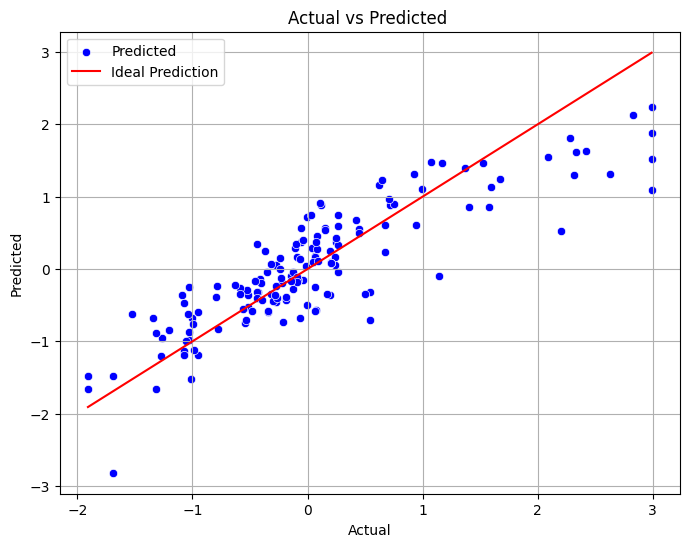

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_results['Actual'], y=df_results['Predicted'], color='blue', label='Predicted')
plt.plot([df_results['Actual'].min(), df_results['Actual'].max()],
         [df_results['Actual'].min(), df_results['Actual'].max()], color='red', label='Ideal Prediction')

plt.title('Actual vs Predicted ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


### **Checking Accuracy**
- We've done The Model Fitting & Analysis in above Cell.
- Now, We've to check the accuracy and MSE.

In [117]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(YTe, yPred)

# Also, MAPE-
mape = mean_absolute_percentage_error(YTe, yPred)

# Calculate R-squared score
r2 = r2_score(YTe, yPred)
print(f"R-squared (R²) Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

R-squared (R²) Score: 0.7532417995961493
Mean Squared Error: 0.2539595148307797
Mean Absolute Percentage Error (MAPE): 3.687250785906491


---
### **Iteration-1**:
- Got **71%** r2 Score.
- Got **84%** Accuracy as pe MAPE
---
### **Iteration-2**:
- Got **75%** r2 Score.
- Changed Sample